# <font>About Dataset</font>

## <font>Content</font>
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## <font>Variables</font>

* RowNumber: Row Numbers from 1 to 10000
* CustomerId: Unique Ids for bank customer identification
* Surname: Customer's last name
* CreditScore: Credit score of the customer
* Geography: The country from which the customer belongs
* Gender: Male or Female
* Age: Age of the customer
* Tenure: Number of years for which the customer has been with the bank
* Balance: Bank balance of the customer
* NumOfProducts: Number of bank products the customer is utilising
* HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
* IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
* EstimatedSalary: Estimated salary of the customer in Dollars
* Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [1]:
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ydata_profiling
import sklearn.metrics as metrics

## <font color='blue'>Análise do banco de dados</font>

In [2]:
df = pd.read_csv('C:\\Users\\u1285310\\OneDrive - MMC\\Documents\\Anaconda\\Aulas + Entregas/Churn_Modelling.csv')
df.head(10) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# Remover as colunas Rownumber and Customerld
df = df.drop(["RowNumber", 'CustomerId'], axis=1)
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


## <font color='blue'>ALGORITMO DE CLASSIFICAÇÃO</font>

### <font color='blue'>Árvore de Decisão</font>

In [5]:
import sklearn.metrics as metrics

In [6]:
#Transformação das váriáveis categóricas para variáveis numéricas
df.HasCrCard = df.HasCrCard.replace({'Non_CredCard':0,'CredCard':1})
df.IsActiveMember = df.IsActiveMember.replace({'Non_ActiveMember':0,'ActiveMember':1})
df.Exited = df.Exited.replace({'Non_Exited':0,'Exited':1})
df.Gender = df.Gender.replace({'Female':0,'Male':1})
df.Geography = df.Geography.replace({'France':1,'Spain':2, 'Germany':3})
df = df.drop("Surname", axis=1) #Remover a variável "Surname".
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Separação das features X e y
X = df.drop("Exited", axis=1)
y = df.Exited

In [8]:
#Separação dos dados em Train (70%) e Test (30%) com um random_state=42.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [9]:
#Criação de um objeto Árvore de Decisão para um modelo de classificação, com um Nível de Profundidade = 2 e uma Semente para reprodutibilidade = 42
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Criaçao do modelo

In [10]:
#Treinamento do modelo criado
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [11]:
#Execução da previsão do modelo em Train and Test
y_train_pred = decision_tree.predict(X_train) #Prediccion en Train
y_test_pred = decision_tree.predict(X_test) #Prediccion en Test

In [12]:
#Cálculo da matriz de confusão
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:', matriz)

Matriz de Confusión: [[2307  109]
 [ 353  231]]


In [13]:
#Cálculo das métricas de avaliação 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cálculo da acurácia de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Valor da acurácia de teste: ',test_accuracy)

# Cálculo da acurácia de treino
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Valor da acurácia de treino: ',train_accuracy)

# Cálculo da precisão
precision = precision_score(y_test, y_test_pred)
print('Valor da precisão: ',precision)

# Cálculo da sensibilidade (recall)
recall = recall_score(y_test, y_test_pred)
print('Valor da sensibilidade: ',recall)

# Cálculo do valor F1
f1 = f1_score(y_test, y_test_pred)
print('Valor F1: ',f1)

# Cálculo da área sob a curva ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_test_pred)
print('Área sob a curva ROC: ',auc_roc)

print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Valor da acurácia de teste:  0.846
Valor da acurácia de treino:  0.8387142857142857
Valor da precisão:  0.6794117647058824
Valor da sensibilidade:  0.3955479452054795
Valor F1:  0.5
Área sob a curva ROC:  0.6752160255828722
MAE: 0.154
MSE: 0.154
RMSE: 0.3924283374069717


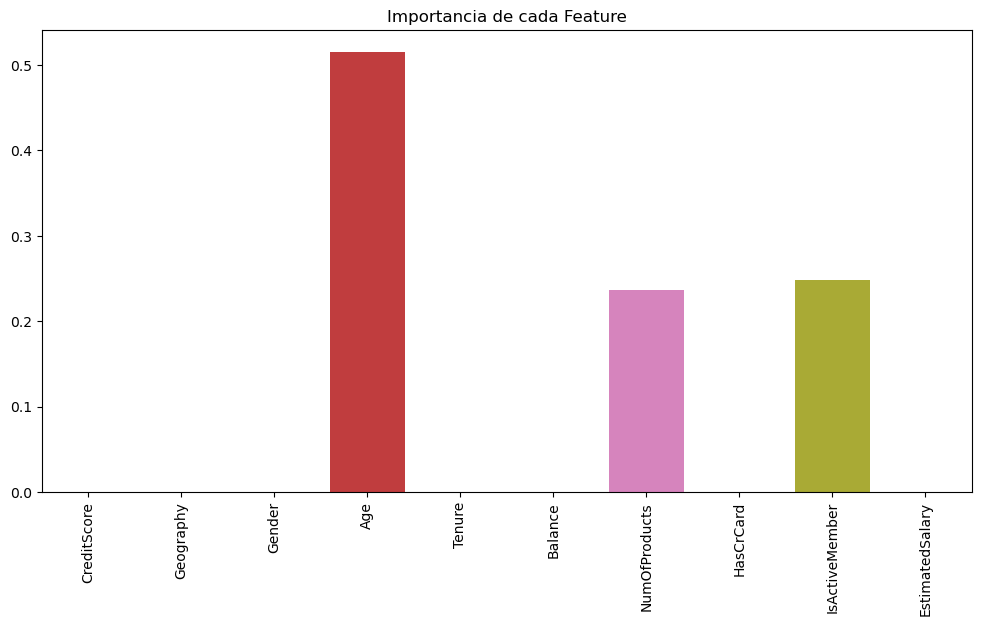

In [14]:
#Visualização das variáveis de maior importância
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.xticks(rotation = 90)
importances = decision_tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()